In [4]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../')
from os.path import join, isdir
import numpy as np
import cv2
from cselect import color as cs
from time import time

from mvpose.data import umpm

root = join(Settings['data_root'], 'pak')
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']

X, Y, Calib = umpm.get(root, 'p2_ball_1', user, pwd)

UMPM


(20, 20, 3)
(60, 60, 3)
(100, 100, 3)
(140, 140, 3)


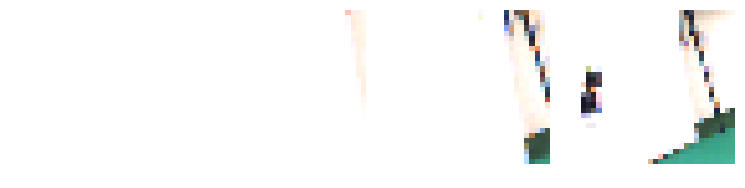

In [99]:
def get_patch(im, x, y, patches=[10, 30, 50, 70], s=30):
    Patches = np.zeros((len(patches), s, s, 3), 'uint8')
    for pid, p in enumerate(patches):
        patch = im[y-p : y+p, x-p : x+p]
        print(patch.shape)
        patch = cv2.resize(patch, (s, s))
        Patches[pid] = patch
    return Patches
        
im = X[0][0]
x = 70; y = 150

fig = plt.figure(figsize=(16,10))

for idx, img in enumerate(get_patch(im, x, y, s=30)):
    ax = fig.add_subplot(1, 5, idx+1)
    ax.imshow(img)
    ax.axis('off')
    
plt.show()

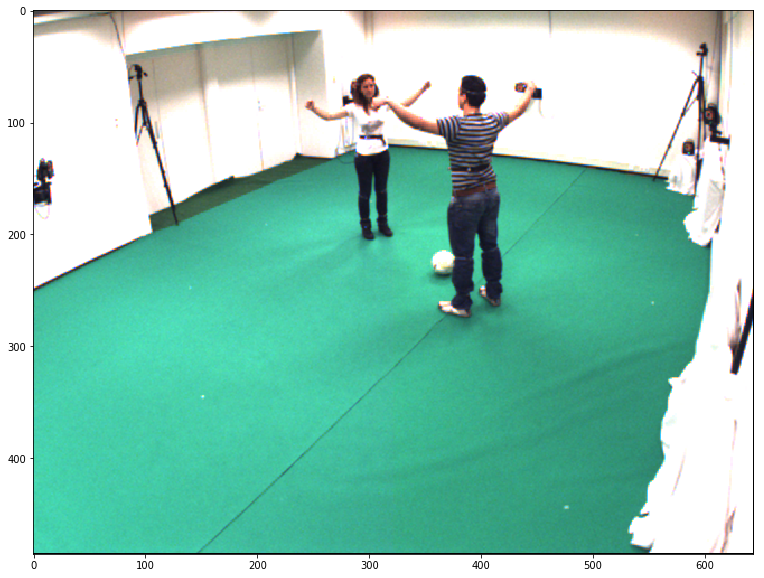

In [97]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
ax.imshow(im)

(28, 4)


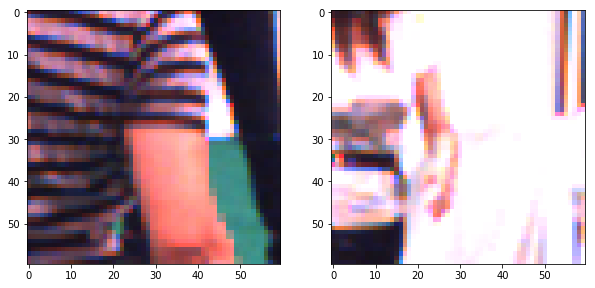

In [92]:
from numpy.random import randint

print(Y[0].shape)

def get_joint(X, Y, Calib, same_person=True):
    n_frames = len(X[0])
    if same_person:
        player1 = randint(1, 3)  # 1 or 2
        player2 = player1
    else:
        player1 = 1
        player2 = 2
        
    cid1 = randint(0, len(X))
    cid2 = randint(0, len(X))
    frame1 = randint(0, n_frames-1)
    frame2 = randint(0, n_frames-1)
    jid1 = randint(0, 14) * player1
    jid2 = randint(0, 14) * player2
    
    im1 = X[cid1][frame1]
    im2 = X[cid2][frame2]
    
    y1 = Y[frame1][jid1][0:3]
    y2 = Y[frame2][jid2][0:3]
    
    x1, y1 = np.squeeze(
        Calib[cid1].projectPoints(np.array([y1]))).astype('int32')
    x2, y2 = np.squeeze(
        Calib[cid2].projectPoints(np.array([y2]))).astype('int32')
    
    k = 30
    
    h1 = im1[y1-k: y1+k, x1-k: x1+k]
    h2 = im2[y2-k: y2+k, x2-k: x2+k]
    
    return h1, h2

im1, im2 = get_joint(X, Y, Calib)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(121).imshow(im1)
fig.add_subplot(122).imshow(im2)

plt.show()